In [288]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
## Read in iris data from csv, display tail to make sure we're on the right track

iris = pd.read_csv('iris.data', header=None)
iris.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


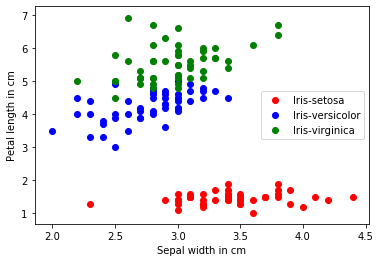

In [104]:
## Getting values and getting a scatter plot for sepal width vs. petal length

setosas = iris.iloc[0:50]
versicolors = iris.iloc[50:100]
virginicas = iris.iloc[100:]

plt.scatter(setosas[1], setosas[2], color='r', label="Iris-setosa")
plt.scatter(versicolors[1], versicolors[2], color='b', label="Iris-versicolor")
plt.scatter(virginicas[1], virginicas[2], color='g', label="Iris-virginica")
plt.xlabel("Sepal width in cm")
plt.ylabel("Petal length in cm")
plt.legend(loc='right')

plt.show()

In [283]:
'''It seems that on the basis of features sepal width and petal length, iris setosa is linearly separable
For simplicity, we will be looking at flowers that are either setosa or versicolor.'''

## Features that will be looked at: Sepal width, petal length
inputs = list(zip(iris.iloc[0:100][1], iris.iloc[0:100][3]))

## Cleaning up versicolor and setosa results to be either 1 or -1
targets = np.where(iris.iloc[0:100][4] == 'Iris-setosa', 1, -1)

In [297]:
'''Here, we provide the Perceptron class that will be our model'''
class Perceptron(object):
    
    def __init__(self, learning_rate=0.01, random_seed=1, epochs=50):
        self.learning_rate = learning_rate
        self.random_seed = random_seed,
        self.epochs = epochs
        
    ## Method that fits model to specific training data
    def fit(self, features, targets): 

        self.w_ = np.random.rand(len(features[0]) + 1)
        current_epoch = 0
        
        while (current_epoch < self.epochs):
            for xi, y in zip(features, targets):
                output = self.predict(xi)
                error = y - output
                
                ## Update the weights
                for i in range(1, len(xi) + 1):
                    correction_val = self.learning_rate * error * xi[i - 1]
                    self.w_[i] += correction_val
                self.w_[0] += self.learning_rate * error
                
            current_epoch += 1
        return self
        
        
    def net_sum(self, features):
        return (np.dot(self.w_[1:], np.transpose(features)) + self.w_[0])
    
    def predict(self, features):
        net_sum = self.net_sum(features)
        
        if net_sum > 0:
            return 1
        else:
            return - 1

In [301]:
'''The big test, let us see if our model can actually do something'''

## Using sklearn train, test split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets)

## Training the model 
ppn = Perceptron()
ppn = ppn.fit(inputs_train, targets_train)

def test_perceptron(ppn, inputs_test, targets_test):
    
    errors = 0
    for xi, y in zip(inputs_test, targets_test):
        output = ppn.predict(xi)
        error = output - y
        
        if error != 0:
            errors += 1
            
    return 1 - (errors / len(inputs_test))

accuracy = test_perceptron(ppn, inputs_test, targets_test)
print(f"Perceptron is distinguishing setosas from versicolors with an accuracy of {accuracy * 100}%")

Perceptron is distinguishing setosas from versicolors with an accuracy of 100.0%
